In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
import matplotlib.image as mping
import numpy as np
import urllib.request
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.models import Model


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#/content/dataset_bali.zip
training_dir = '/content/drive/MyDrive/Capstone/dataset_newfix'

training_datagen = ImageDataGenerator(rescale=1./255,
                                      validation_split=0.2
                                      )

#vall_datagen = ImageDataGenerator(rescale=1 / 255)

train_generator= training_datagen.flow_from_directory(
        training_dir,
        target_size=(150, 150),
        batch_size=64,
        class_mode='categorical',
        subset = 'training'
    )

vall_generator = training_datagen.flow_from_directory(
        training_dir,
        target_size=(150, 150),
        batch_size=64,
        class_mode='categorical',
        subset = 'validation'
    )

Found 4032 images belonging to 55 classes.
Found 982 images belonging to 55 classes.


In [ ]:

model=tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      # The second convolution
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      # The third convolution
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      # The fourth convolution
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      # The fifth convolution
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      # Flatten the results to feed into a DNN
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
      tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
      # YOUR CODE HERE, end with a Neuron Dense, activated by sigmoid
      tf.keras.layers.Dense(55, activation='softmax')
      ])

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

model.fit(
        train_generator,
        validation_data=vall_generator,
        epochs=40,
    )

Epoch 1/40
63/63 [==============================] - 150s 2s/step - loss: 7.2288 - accuracy: 0.0499 - val_loss: 4.1726 - val_accuracy: 0.1283
Epoch 2/40
63/63 [==============================] - 155s 2s/step - loss: 3.1021 - accuracy: 0.2741 - val_loss: 2.4721 - val_accuracy: 0.4409
Epoch 3/40
63/63 [==============================] - 158s 3s/step - loss: 2.2221 - accuracy: 0.4975 - val_loss: 1.9916 - val_accuracy: 0.5468
Epoch 4/40
63/63 [==============================] - 157s 3s/step - loss: 1.8305 - accuracy: 0.6034 - val_loss: 1.5501 - val_accuracy: 0.6772
Epoch 5/40
63/63 [==============================] - 154s 2s/step - loss: 1.5818 - accuracy: 0.6674 - val_loss: 1.4415 - val_accuracy: 0.6802
Epoch 6/40
63/63 [==============================] - 150s 2s/step - loss: 1.4604 - accuracy: 0.6907 - val_loss: 1.4338 - val_accuracy: 0.6884
Epoch 7/40
63/63 [==============================] - 149s 2s/step - loss: 1.3040 - accuracy: 0.7361 - val_loss: 1.3782 - val_accuracy: 0.6782
Epoch 8/40
63

Saving Screenshot 2023-12-13 113812.png to Screenshot 2023-12-13 113812 (7).png
1/1 [==============================] - 0s 218ms/step
Screenshot 2023-12-13 113812 (7).png
This image belongs to class Ta


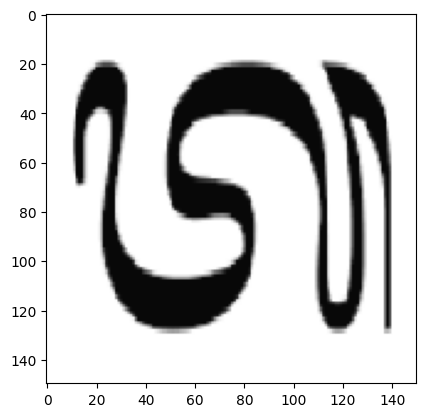

In [15]:
import numpy as np
from keras.preprocessing import image
from google.colab import files
from keras.models import load_model
import matplotlib.pyplot as plt

labels = {value: key for key, value in train_generator.class_indices.items()}

saved_model = load_model("modelfixbgt.h5")

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size = (150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = saved_model.predict(images, batch_size = 100)

  print(fn)

  class_list = labels

  for j in range(55):
    if classes[0][j] == 1.:
        print('This image belongs to class', class_list[j])
        break

Saving Screenshot 2023-12-19 183620.png to Screenshot 2023-12-19 183620.png
1/1 [==============================] - 0s 41ms/step
Screenshot 2023-12-19 183620.png
This image belongs to class Ca


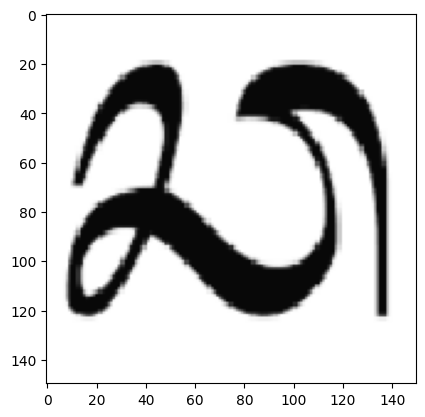

In [ ]:
labels = {value: key for key, value in train_generator.class_indices.items()}

import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size = (150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 100)

  print(fn)

  class_list = labels

  for j in range(55):
    if classes[0][j] == 1.:
        print('This image belongs to class', class_list[j])
        break

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 36, 36, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 17, 17, 64)       

In [ ]:
!pip install tensorflowjs

In [ ]:
model.save("/content/drive/MyDrive/aksarabalii.pb")

In [ ]:
!tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model /content/drive/MyDrive/aksarabalii.pb /content/drive/MyDrive/

2023-12-19 09:43:30.722504: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 09:43:30.722570: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 09:43:30.723974: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 09:43:31.964182: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
model.save("path/save/modelfixbgt.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
